In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%load_ext autoreload
%autoreload 2

import os
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

print(os.listdir('/kaggle/input'))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['d', 'fuv-synthetic-data-v30']


In [2]:
import keras
print(keras.__version__)

2.4.3


In [3]:
import model

rpath_test = '/kaggle/input/fuv-data-10s/D20200101_010/D20200101_010'
rpath_test = '../input/fuv-synthetic-data-v30/D20210121_v3.0/D20210121_nstarts=35_max-amp=1e+04_noise=0_v3.0'
rpath_test = '../input/fuv-synthetic-data-v30/D20210101_v3.1/D20210101_nstarts=35_max-amp=1e+04_noise=0_y0=000_v3.1'
rpath_test = '../input/fuv-synthetic-data-v30/D20200101_v3.1/D20200101_nstarts=35_max-amp=1e+04_noise=0_y0=000_v3.1'
rpath_test = '../input/fuv-synthetic-data-v30/D20200618_smoothing0_v5.20/D20200618_nstarts=01_max-amp=5e+05_noise=0_x0=000_smoothing=0_v5.20'

rpath = '/kaggle/input/fuv-data/L1_synthetic'
rpath = '/kaggle/input/fuv-data-s5/D005'
rpath = '/kaggle/input/fuv-data-s7/D007'
rpath = '/kaggle/input/fuv-data-10s/D20201105_010/D20201105_010'
rpath = '../input/fuv-synthetic-data-v30/D20201105_v3.1/D20201105_nstarts=35_max-amp=1e+04_noise=0_v3.1'
rpath = '../input/fuv-synthetic-data-v30/D20201105_v3.2/D20201105_nstarts=35_max-amp=1e+03_noise=0_y0=000_v3.2'
rpath = '../input/fuv-synthetic-data-v30/D20201105_v3.3/D20201105_nstarts=35_max-amp=3e+03_noise=0_y0=000_v3.3'
rpath = '../input/fuv-s9ynthetic-data-v30/D20201105_v3.6/D20201105_nstarts=35_max-amp=3e+03_noise=0_y0=000_v3.6'

rpath = '../input/fuv-synthetic-data-v30/D20201105_v3.7/D20201105_nstarts=35_max-amp=3e+03_noise=0_y0=000_v3.7'

rpath = '../input/fuv-synthetic-data-v30/D20201105_amp3e03_v3.71/D20201105_nstarts=35_max-amp=3e+03_noise=0_y0=000_v3.71'
rpath ='../input/fuv-synthetic-data-v30/D20201105_v4.00/D20201105_nstarts=20_max-amp=3e+04_noise=0_x0=010_v4.00'
rpath = '../input/fuv-synthetic-data-v30/D20201105_smoothing0_v5.00/D20201105_nstarts=20_max-amp=1e+05_noise=0_x0=010_smoothing=0_v5.00'
rpath = '../input/fuv-synthetic-data-v30/D20201105_smoothing0_v5.10/D20201105_nstarts=20_max-amp=1e+05_noise=0_x0=010_smoothing=0_v5.10'
rpath = '../input/fuv-synthetic-data-v30/D20201105_smoothing0_v5.20/D20201105_nstarts=20_max-amp=1e+05_noise=0_x0=010_smoothing=0_v5.20'

rpath = '../input/fuv-synthetic-data-v30/D20201105_nstarts25_v4.10/D20201105_nstarts=25_max-amp=3e+04_noise=0_x0=000_smoothing=0_v4.00'

rpath = '../input/fuv-synthetic-data-v30/D_SW_new_20201105_nS30_v4.40/D_SW_new_20201105_nS=30_maxA=1e+05_noise=0_smooth=0_v4.40'
rpath = '../input/fuv-synthetic-data-v30/D_SW_new_20201105_nS30_v5.40/D_SW_new_20201105_nS=30_maxA=1e+05_noise=0_smooth=0_v5.40'

# rpath = '../input/fuv-synthetic-data-v30/D_SW_new_20201105_nS30_noise1_v5.40/D_SW_new_20201105_nS=30_maxA=1e+05_noise=1_smooth=0_v5.40'

create_model = model.denoise_net
# create_model = model.autoencoder_net

version = 4.4

nlayers = 5
nfilters = 64

#Dataset version 3.7
n_training = 2207*10 #10 star positions
n_validating = 2207*1

#Dataset version v4.0 and v5.0
n_training = 2192*20 #10 star positions
n_validating = 2192*1

#Dataset version v4.0
n_training = 1968*30 #10 star positions
n_validating = 1968*1

# #Dataset version v4.4 (Temporal)
# n_training = 723*30 #10 star positions
# n_validating = 723*1

bs = 64

epochs = 20

load = True
train = True# not (load)

learning_rate = 1e-4

optimizer = 'adam'

total_variation_weight = 0#1e-4
 
ena_scaling = False
scaler = None #model.get_scaler(rpath=rpath)

In [4]:
from keras import backend
import tensorflow as tf

if load:
    path = '../input/d/miguelurco/cnnstarremoval10l64f/denoise_final_%2.1f' %version
    
    mod = model.restore_model(path=path,
                             total_variation_weight=total_variation_weight)
    
    ini_epoch = 12 #int(mod.optimizer.iterations.numpy()/n_training*bs) 
    
    print('Previous learning_rate: ', backend.eval(mod.optimizer.lr))
    backend.set_value(mod.optimizer.lr, learning_rate)
    print('Current learning_rate: ',backend.eval(mod.optimizer.lr))
else:
    mod = create_model(nlayers=nlayers,
                        nfilters=nfilters,
                        learning_rate=learning_rate,
                        kernel_size=(11,3),
                        noise_kernel_size=(31,6),
                        loss='mse',
                        optimizer=optimizer,
                        total_variation_weight=total_variation_weight,
                        offset=-51.,
                       )
    
    ini_epoch=0

print('Epoch: ', ini_epoch)
    

Previous learning_rate:  1e-04
Current learning_rate:  1e-04
Epoch:  12


In [5]:
print(mod.history)

None


Epoch 13/20
922/922 [==============================] - 1076s 1s/step - loss: 3.5832 - mse: 3.5832 - val_loss: 2.6502 - val_mse: 2.6502

Epoch 00013: saving model to denoise_4.4
Epoch 14/20
922/922 [==============================] - 1068s 1s/step - loss: 3.3176 - mse: 3.3176 - val_loss: 2.5721 - val_mse: 2.5721

Epoch 00014: saving model to denoise_4.4
Epoch 15/20
922/922 [==============================] - 1068s 1s/step - loss: 3.1775 - mse: 3.1775 - val_loss: 2.5608 - val_mse: 2.5608

Epoch 00015: saving model to denoise_4.4
Epoch 16/20
922/922 [==============================] - 1068s 1s/step - loss: 3.4524 - mse: 3.4524 - val_loss: 2.6669 - val_mse: 2.6669

Epoch 00016: saving model to denoise_4.4
Epoch 17/20
922/922 [==============================] - 1068s 1s/step - loss: 3.0829 - mse: 3.0830 - val_loss: 2.4973 - val_mse: 2.4973

Epoch 00017: saving model to denoise_4.4
Epoch 18/20
922/922 [==============================] - 1068s 1s/step - loss: 2.8929 - mse: 2.8929 - val_loss: 2.321

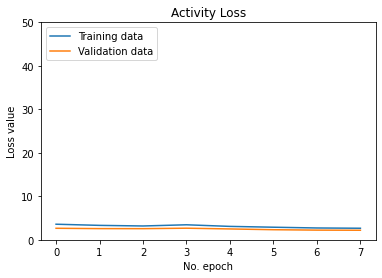

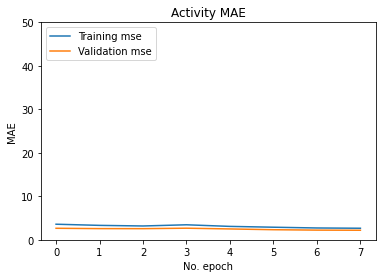

In [6]:
if train:
    hist= model.train_w_generator(mod, rpath=rpath,
                                  bs=bs, epochs=epochs,
                                  n_training=n_training,
                                  n_validating=n_validating,
                                  version=version,
                                  initial_epoch=ini_epoch,
                                  ena_scaling=ena_scaling)
    
    model.plot_history(hist,
                  min_loss=0, max_loss=50,
                  min_metric=0, max_metric=50)

In [7]:
import matplotlib.pyplot as plt

def plot_images(x0, y0, y0_hat, vmin = -5, vmax=100):

    plt.figure(figsize=(15,4))
    plt.subplot(131)
    plt.pcolormesh(x0[:,:], cmap='jet', vmin=vmin,vmax=vmax)
    # plt.colorbar()
    plt.subplot(132)
    plt.pcolormesh(y0[:,:], cmap='jet', vmin=vmin, vmax=vmax)
    # plt.colorbar()
    plt.subplot(133)
    plt.pcolormesh(y0_hat[:,:], cmap='jet', vmin=vmin, vmax=vmax)
    plt.show()

    plt.figure(figsize=(15,15))
    plt.subplot(311)
    plt.plot(x0[:,:])
    plt.ylim(vmin,vmax)
    plt.grid()

    plt.subplot(312)
    plt.plot(y0[:,:])
    plt.ylim(vmin,vmax)
    plt.grid()

    plt.subplot(313)
    plt.plot(y0_hat[:,:])
    plt.ylim(vmin,vmax)
    plt.grid()

    plt.show()

def plot_rti(X,
             t_ini=0, t_end=-1,
             h_ini=0, h_end=-1,
             vmin =-5, vmax = 50,
             stripe=3):
    
    plt.figure(figsize=(18,4))
    plt.pcolormesh(X[t_ini:t_end,h_ini:h_end,stripe,0].T,
                   vmin=vmin, vmax=vmax, cmap='jet')
    plt.colorbar()
    plt.show()

In [8]:
# rpath = '/kaggle/input/fuv-data-s7/D007'
# X_test1, y_test1 = model.load_data(rpath=rpath, scaler=scaler,
#                                  version=1.0)

# plot_rti(X_test1, t_end=500)
# plot_rti(y_test1, t_end=500)

In [9]:
#rpath_test = '../input/fuv-synthetic-data-v30/D20210101_v3.1/D20210101_nstarts=35_max-amp=1e+04_noise=0_y0=000_v3.1'
#rpath_test = '../input/fuv-synthetic-data-v30/D20201105_v3.7/D20201105_nstarts=35_max-amp=3e+03_noise=0_y0=000_v3.7'
rpath_test = '../input/fuv-synthetic-data-v30/D20200101_v3.1/D20200101_nstarts=35_max-amp=1e+04_noise=0_y0=000_v3.1'
rpath_test = '../input/fuv-synthetic-data-v30/D20200618_smoothing0_v5.20/D20200618_nstarts=01_max-amp=5e+05_noise=0_x0=000_smoothing=0_v5.20'


X_test, y_test, scaler = model.load_data(rpath=rpath_test,
                                         scaler=scaler,
                                         version=1.1,
                                         ena_scaling=ena_scaling,
                                         stars_key='image_ori')

In [10]:
print(X_test.shape)

(500, 256, 6, 1)


In [11]:
import artifactremoval
import numpy as np

nt = X_test.shape[0]

X_test0 = X_test[:,:,:,0]
X_test0 = np.transpose(X_test0, (2,1,0))

fuv_mode = np.ones(nt)*2

X_test0 = artifactremoval.artifact_removal(X_test0, channel=1, fuv_mode=fuv_mode)

X_test0 = np.transpose(X_test0, (2,1,0))[:,:,:,None]

In [12]:
# X_test0 = X_test0 + 10
y_hat0 = mod.predict(X_test0)

In [13]:
# nt = y_hat.shape[0]

# y_hat0 = y_hat[:,:,:,0]
# y_hat0 = np.transpose(y_hat0, (2,1,0))

# fuv_mode = np.ones(nt)*2

# y_hat0 = artifactremoval.artifact_removal(y_hat0*5, channel=1, fuv_mode=fuv_mode)/5

# y_hat0 = np.transpose(y_hat0, (2,1,0))[:,:,:,None]

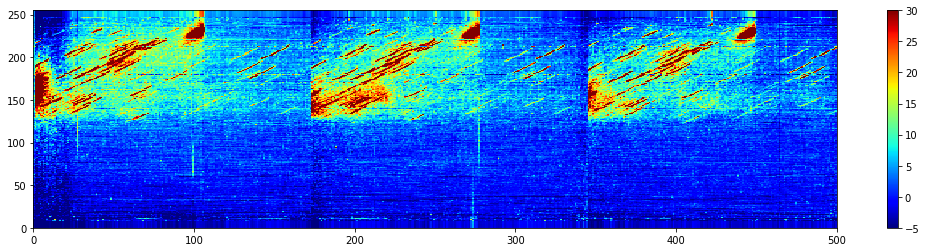

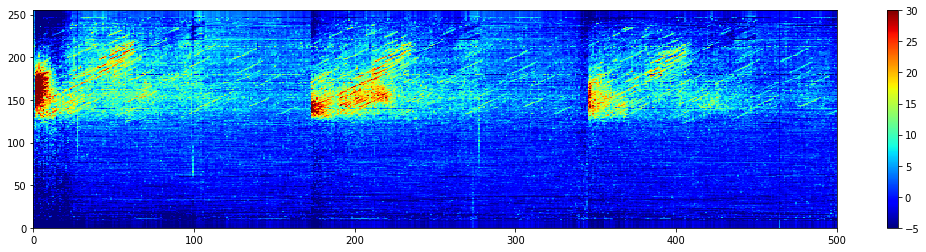

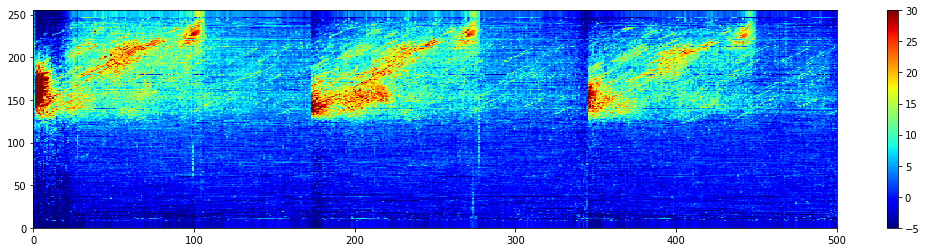

In [14]:
t_ini = 1300
t_ini = 0
t_end = 1900
h_ini = 0 

stripe = 5
vmax = 30

plot_rti(X_test0, t_ini=t_ini, t_end=t_end, stripe=stripe, vmax = vmax, h_ini=h_ini)

plot_rti(y_hat0, t_ini=t_ini, t_end=t_end, stripe=stripe, vmax = vmax, h_ini=h_ini)

plot_rti(y_test, t_ini=t_ini, t_end=t_end, stripe=stripe, vmax = vmax, h_ini=h_ini)


# y_shape = y_hat.shape
# y_scaled = np.reshape(y_hat, (y_shape[0],-1))
# y_scaled = scaler.inverse_transform(y_scaled)
# y_scaled = np.reshape(y_scaled, y_shape)

# plot_rti(y_scaled, t_end=500, vmin =-5, vmax = 30)

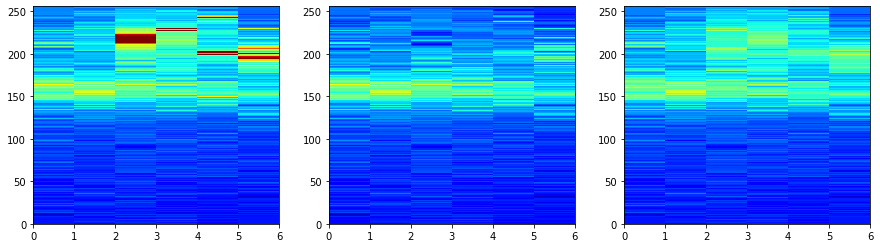

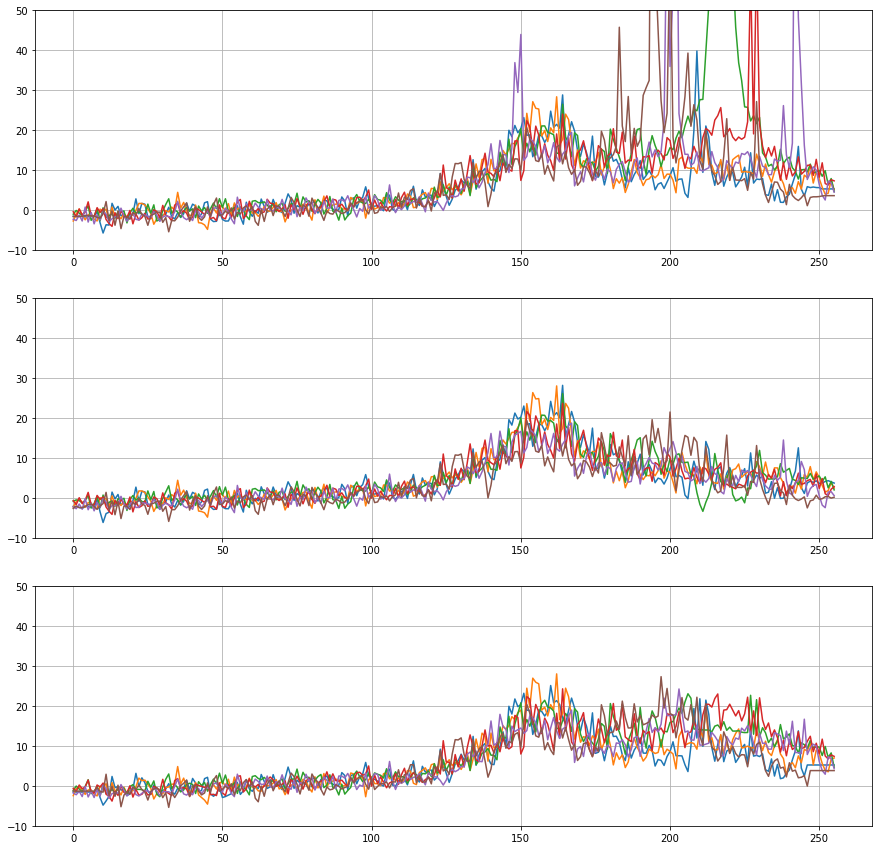

In [15]:
import numpy as np
from scipy.ndimage import gaussian_filter

i = t_ini+225
x0 = X_test0[i,:,:,0]
y0 = y_test[i,:,:,0]
y0_hat = y_hat0[i,:,:,0]

# y0 = gaussian_filter(y0, sigma=(6,0.5))
# y0_hat = gaussian_filter(y0_hat, sigma=(6,0.5))


plot_images(x0[:,], y0_hat[:,], y0[:,], vmin=-10, vmax=50)

In [16]:
import numpy as np
from keras import models

# mod.summary()

layer_outputs = []
layer_names = []
layer_indices = []

for k, layer in enumerate(mod.layers):
    
    layer_outputs.append(layer.output)
    layer_names.append(layer.name)
    
    if ('linear_output' != layer.name): # and ('exp' not in layer.name):
        continue
    
    layer_indices.append(k)

activation_model = models.Model(inputs=mod.input, outputs=layer_outputs)

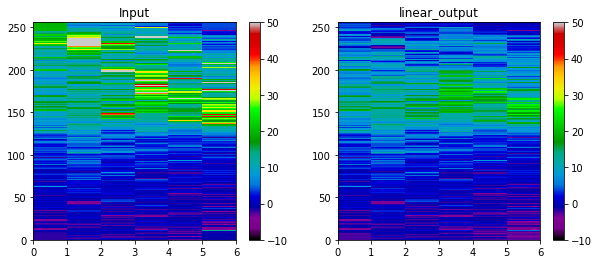

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

cmap = 'nipy_spectral'

i = 200
img_tensor = image.img_to_array(X_test0[i])
img_tensor = np.expand_dims(img_tensor, axis=0)

activations = activation_model.predict(img_tensor) 

for k in layer_indices:
    
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.title('Input')
    plt.pcolormesh(X_test0[i,:,:,0], cmap=cmap, vmin=-10, vmax=50)
    plt.colorbar()
    
    plt.subplot(122)
    plt.title(layer_names[k])
    b = activations[k][0, :, :, 0]
    
    if 'log' in layer_names[k]:
        b = np.exp(b)
        vmin=0
        vmax=3
        
    if 'log_output' == layer_names[k]:
        b -= 51
        vmin=-10
        vmax=50
    
    if 'linear_output' == layer_names[k]:
        b -= 51
        vmin=-10
        vmax=50
        
    plt.pcolormesh(b, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.colorbar()
    plt.show()

In [18]:
print('hola')

hola
